# House Prices - Advanced Regression Techniques
[Kaggle page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

import os
import warnings 
warnings.filterwarnings("ignore")

## Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Preprocessing

In [5]:
# Removing ID
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
train.shape

(1460, 80)

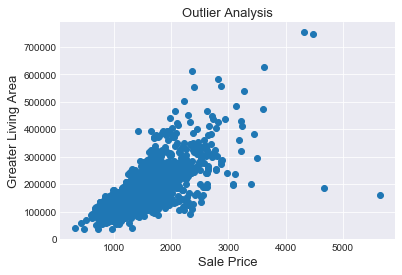

In [6]:
# Take a look at outliers
f, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('Sale Price', fontsize=13)
plt.ylabel('Greater Living Area', fontsize=13)
plt.title('Outlier Analysis', fontsize=13)
plt.show()

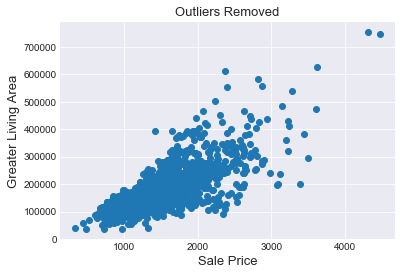

In [7]:
# Remove outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Replot
f, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('Sale Price', fontsize=13)
plt.ylabel('Greater Living Area', fontsize=13)
plt.title('Outliers Removed', fontsize=13)
plt.show()

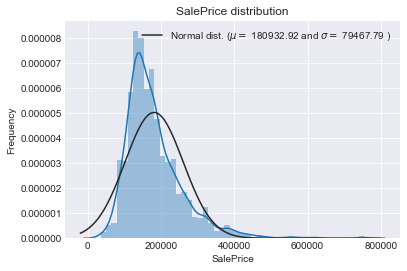

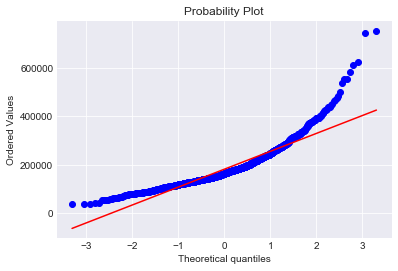

In [8]:
# Distribution of saleprice
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

What the quantile plot is showing us is that the response (target) variable is right skewed. Since linear models prefer normal data, we need to transform the response variable to make it more normally distributed.

In [9]:
# Log-transformation of response
# Returning the natural logarithm of one plus the input array, element-wise.
train['SalePrice'] = np.log1p(train['SalePrice'])

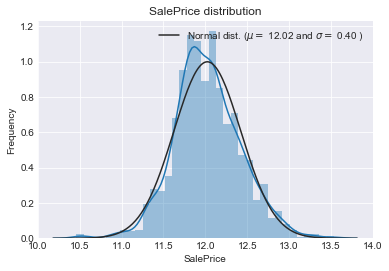

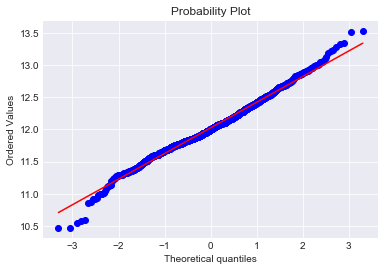

In [10]:
# Distribution of saleprice
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Feature Engineering

In [11]:
train.shape

(1458, 80)

In [12]:
test.shape

(1459, 79)

In [13]:
# Saving shapes for when we need to revert back to train, test, post-processing
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

# Concatenate train and test for feature engineering
total = pd.concat((train,test)).reset_index(drop=True)
total.drop(['SalePrice'], axis=1, inplace=True)
total.shape

(2917, 79)

### Missing Values

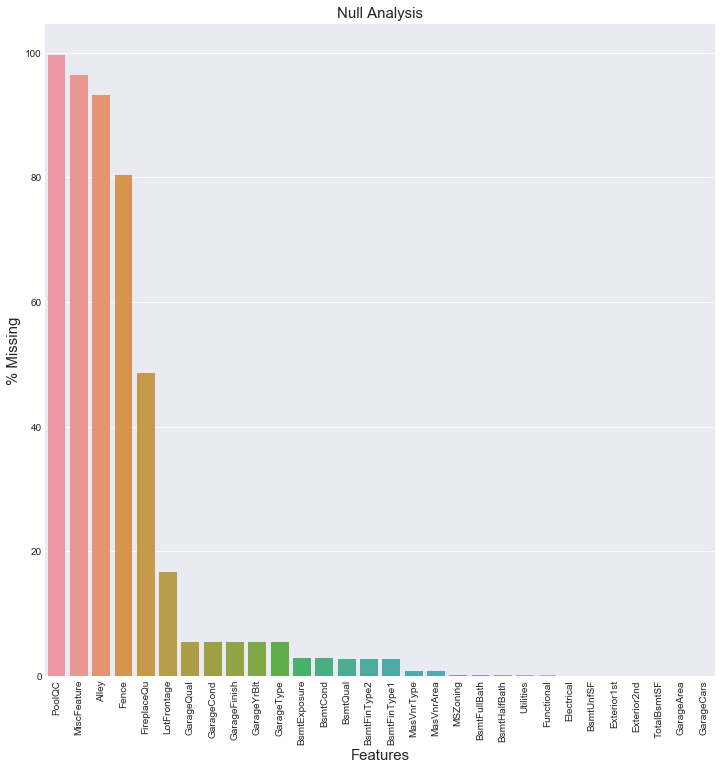

In [14]:
# Calculate proportion of missing values per variable
total_na = total.isnull().sum()/len(total)*100
total_na_plot = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]

# Plot proportions
f, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% Missing', fontsize=15)
plt.title('Null Analysis', fontsize=15)
sns.barplot(x=total_na_plot.index, y=total_na_plot);

In [15]:
# Imputation

# Simple cases where few houses actually have the following variables (default=string 'None').
for var in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'MSSubClass', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    total[var] = total[var].fillna("None")

# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
total['LotFrontage'] = total.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Simple cases where few houses actually have the following variables (default=integer val of 0).
for var in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']:
    total[var] = total[var].fillna(0)

# Drop seemingly useless variable. All entries aside 2 have same value
total = total.drop(['Utilities'], axis=1)

# Mode imputation
for var in ['SaleType', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd']:
    total[var] = total[var].fillna(total[var].mode()[0])

# Special cases
total["Functional"] = total["Functional"].fillna("Typ")

In [16]:
# Check if any remaining missings
total_na = total.isnull().sum()/len(total)*100
total_na_plot = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
total_na_plot = pd.DataFrame({'Missing Ratio' :total_na_plot})
total_na_plot

,Missing Ratio


In [17]:
# Adding total square footage feature
total['TotalSF'] = total['TotalBsmtSF'] + total['1stFlrSF'] + total['2ndFlrSF']

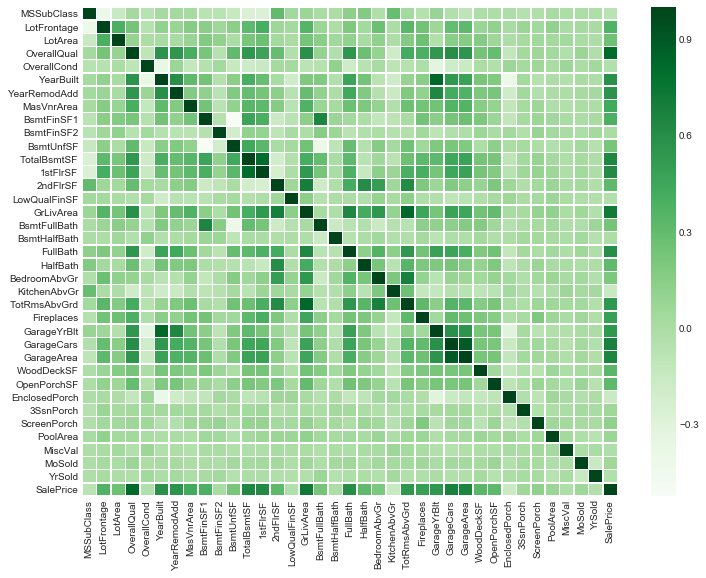

In [18]:
# Heatmap - Correlation plot
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(), annot=False, linewidths=0.5, fmt='.2f', ax=ax, cmap='Greens');

### Variable Type Conversion + Label Encoding

In [19]:
# Numerical >>> Categorical
for var in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    total[var] = total[var].astype(str)

In [20]:
# Label Encoding (Converting levels of string variable to integer)
from sklearn.preprocessing import LabelEncoder
encodable = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
             'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
             'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
             'YrSold', 'MoSold')

# Encode categorical features
for var in encodable:
    lbl = LabelEncoder()
    lbl.fit(list(total[var].values))
    total[var] = lbl.transform(list(total[var].values))
    
# Check out table post-transformation
total.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,WD,0,1,8,856.0,0,2003,2003,2,2566.0
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,WD,0,1,6,1262.0,298,1976,1976,1,2524.0
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,WD,0,1,6,920.0,0,2001,2002,2,2706.0
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,WD,0,1,7,756.0,0,1915,1970,0,2473.0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,WD,0,1,9,1145.0,192,2000,2000,2,3343.0


### Skewed Features

In [21]:
# Output skew of all heavily skewed numerical variables
num_vars = total.dtypes[total.dtypes != 'object'].index
skews = total[num_vars].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_tab = pd.DataFrame({'Skew' : skews})
skew_tab[abs(skew_tab['Skew']) > 0.75].head()

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [22]:
print("There are {} skewed variables that need to be transformed with the Box Cox transform".format(skews.shape[0]))

There are 59 skewed variables that need to be transformed with the Box Cox transform


In [23]:
from scipy.special import boxcox1p
skews_bc = skews.index

# Perform boxcox transformation with custom lambda(la) value
la = 0.15
for col in skews_bc:
    total[col] = boxcox1p(total[col], la)
    
total.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,0.730463,1.540963,1Fam,1.820334,1.540963,11.170327,0.0,...,WD,0.0,0.730463,2.602594,11.692623,0.000000,14.187527,14.187527,1.194318,14.976591
1,12.792276,0.000000,0.0,0.730463,1.540963,1Fam,1.820334,0.730463,12.062832,0.0,...,WD,0.0,0.730463,2.259674,12.792276,9.010206,14.145138,14.145138,0.730463,14.923100
2,11.892039,11.724598,0.0,0.730463,1.540963,1Fam,1.820334,1.194318,10.200343,0.0,...,WD,0.0,0.730463,2.259674,11.892039,0.000000,14.184404,14.185966,1.194318,15.149678
3,12.013683,11.354094,0.0,0.730463,1.540963,1Fam,0.730463,1.540963,8.274266,0.0,...,WD,0.0,0.730463,2.440268,11.354094,0.000000,14.047529,14.135652,0.000000,14.857121
4,12.510588,12.271365,0.0,0.730463,1.820334,1Fam,1.820334,0.000000,10.971129,0.0,...,WD,0.0,0.730463,2.750250,12.510588,8.013884,14.182841,14.182841,1.194318,15.852312


### One-hot Encoding

In [24]:
total = pd.get_dummies(total)
total.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1


## Modeling

In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [26]:
# Re-create test and train post-processing
train = total[:ntrain]
test = total[ntrain:]
print('test shape: {} and train shape: {}'.format(test.shape, train.shape))

test shape: (1459, 220) and train shape: (1458, 220)


In [27]:
# Validation Function
n_folds = 5

def rmsle_cv(model):
    '''
    Returns the root mean squared logarithmic error

    RMSLE = log(predicted+1)−log(actual+1)
    '''
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [28]:
# Base Models
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [30]:
# Scores
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)

ElasticNet score: 0.1116 (0.0074)

Kernel Ridge score: 0.1153 (0.0075)

Gradient Boosting score: 0.1177 (0.0080)

Xgboost score: 0.1157 (0.0063)

